## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.utils import shuffle
import numpy as np

### Загрузка и ознакомление с данными

In [2]:
df = pd.read_csv('Churn_data.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


**Вывод:**
1. В таблице содержится 10000 строк и 14 столбцов.
2. Столбцы *RowNumber*, *CustomerId* и *Surname* бесполезны для предсказания оттока клиентов, следовательно должны быть удалены.
3. В столбце *Tenure* имеется 909 пропущенных значений, который должны быть обработаны тем или иным образом.
4. Столбцы *Gender* и *Geography* должны быть закодированы.
5. Столбцы, содержащие численные данные, должны быть стандартизированы.

### Удаление неинформативных столбцов

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Обработка пропусков

Пропуски были обнаружены лишь в столбце, содержащем информацию о том, сколько лет человек является клиентом банка. Для корректной обработки детальнее взглянем на данный столбец. Сначала построим гистограмму.

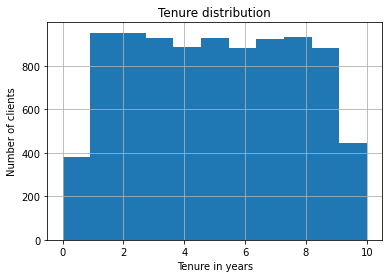

In [7]:
df.Tenure.hist(bins=11)
plt.xlabel('Tenure in years')
plt.ylabel('Number of clients')
plt.title('Tenure distribution')
plt.show()

В датасете представлены клиенты, являющиеся членами банка 10 или менее лет. Количество клиентов, пользующихся банком от 1 до 9 лет примерно одинаково. Клиентов, которые пользуются услугами банка 10 лет или которые присоединились в этом году, значительно меньше.

Посмотрим на распределение *Tenure* клиентов, которые покинули банк, и которые остались с банком.

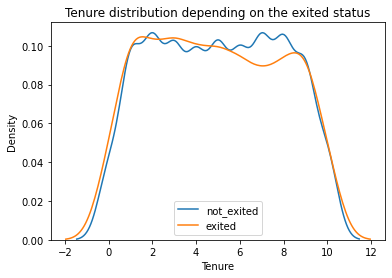

In [10]:
sns.kdeplot(df[df['Exited'] == 0]['Tenure'].dropna(), label='not_exited')
sns.kdeplot(df[df['Exited'] == 1]['Tenure'].dropna(), label='exited')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Tenure distribution depending on the exited status')
plt.legend()
plt.show()

Распределения выглядят крайне похоже, и можно предположить, что количество лет, проведенных с банком, никак не влияет на то, покинет ли клиент банк или нет. Чтобы проверить данную гипотезу воспользуемся статистическим тестом. 

Создаем две выборки.

In [11]:
bank_customers = df[df['Exited'] == 0]['Tenure'].dropna()
left_the_bank = df[df['Exited'] == 1]['Tenure'].dropna()

Проверяем, равны ли дисперсии генеральных совокупностей с помощью теста Левене. Устанавливаем уровень значимости 0.05. Если p-значение будет ниже него, то будем считать дисперсии разными.

In [12]:
print(levene(bank_customers, left_the_bank).pvalue)

0.14231415346649656


Р-значение вы уровня значимости, следовательно нет оснований отвергать нулевую гипотезу. Делаем вывод, что дисперсии равны.

Проведем t-test для проверки равенства средних двух выборок.

**Уровень значимости**: 0.05.

In [13]:
print(ttest_ind(bank_customers, left_the_bank, equal_var=True).pvalue)

0.11003295340373204


Нет оснований отвергать нулевую гипотезу. Делаем вывод, что средние двух выборок равны.

Взглянем на коэффициент корреляции Пирсона.

In [14]:
df[['Tenure','Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.016761
Exited,-0.016761,1.000000


Делаем вывод, что между фактом выхода и количеством лет, проведенных с банком, нет линейной зависимости.

**Вывод:**
1. Распределения Tenure для клиентов, покинувших банк и оставшихся с банком, похожи, а их средние статистически не различаются.
2. Отсутствует линейная корреляция между фактом выхода из банка и количеством лет пользования банком.
3. На основе вышеизложенных фактов делаем вывод, что *Tenure* никак не влияет на факт того, что клиент покинет банк. Следовательно, данный столбец неинформативен для нас и может быть удален. 

In [15]:
df = df.drop('Tenure', axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


### Кодирование категориальных переменных

Для кодирования категориальных переменных (пол и география) воспользуемся техникой One Hot Encoding. Для избежания дамми-ловушки сокращаем количество дамми-переменных на 1.

In [17]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [18]:
df_ohe.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0


Франция закодированы нулями в столбцах *Geography_Germany*, *Geography_Spain*.
Женщины закодированы нулями в столбце *Gender_Male*.

### Разделение на обучающую и тестовую выборки

Выделим признаки и целевой признак.

In [19]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

Разделим набор данных на обучающую и тестовую выборки в соотношении 80:20. 

In [20]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            stratify=target,
                                                                            random_state=42)

Проверим размер получившехся выборок.

In [21]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


**Вывод:** разделение на обучающую и тестовую выборки в соотношении 80:20 проведено успешно.

### Стандартизация численных переменных

Проведем стандартизацию численных переменных.

In [22]:
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Взглянем на получившиеся таблицы.

In [23]:
features_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2151,1.058568,1.715086,-1.226059,-0.910256,1,0,1.042084,0,0,1
8392,0.913626,-0.659935,0.413288,-0.910256,1,0,-0.623556,1,0,1
5006,1.079274,-0.184931,0.601687,0.808830,1,1,0.308128,1,0,0
4117,-0.929207,-0.184931,-1.226059,0.808830,1,0,-0.290199,0,0,1
7182,0.427035,0.955079,0.548318,0.808830,0,1,0.135042,1,0,1


In [24]:
features_test.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,-0.680735,-0.279932,-1.226059,0.808830,1,0,-0.095021,0,0,1
3667,-1.301915,-0.564935,0.877113,0.808830,0,0,-0.778941,1,0,1
1617,-0.970619,0.100072,-1.226059,0.808830,0,1,0.099469,0,1,0
5673,-0.121674,-0.469934,1.011458,0.808830,0,0,-1.147374,0,1,1
4272,-0.111321,-0.469934,0.023204,-0.910256,1,1,1.200283,0,1,0


### Вывод

1. Из набора данных были удалены неинформативные столбцы.
2. Пропуски были обнаружены лишь в одном столбце, который был удален.
3. Категориальные признаки были закодированы с помощью техники One Hot Encoding.
4. Набор данных был разделен на обучающую и тестовую выборки в соотношении 80:20.
5. Была проведена стандартизация численных переменных.

## Обучение моделей

Перед обучением моделей проверим, имеется ли баланс классов в нашем наборе данных.

In [25]:
df_ohe.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

В нашем случае мы имеем дело с дисбалансом. Количество клиентов, оставшихся с банком, практически в 4 раза выше, чем тех, что покинули банк.

В данном пункте мы обучим несколько моделей без учета дисбаланса классов. Будем исследовать четыре модели: логистическую регрессию, метод к-ближайщих соседей, дерево решений и случайный лес. Оптимизацию гиперпараметров проведем с помощью техники GridSearch в комбинации с кросс-валидацией.

### Логистическая регрессия

В данной моделе будем настраивать параметр С, который отвечает за регуляризацию. Чем выше С, тем слабее регуляризация. Кросс-валидацию проведем с 5 фолдами, что означает, что каждую итерацию 20% от обучающей выборки будет использовано в качестве валидационной выборки. В качестве метрики будем использовать f1_score.

In [26]:
parameters = [{'C' : [0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20, 25, 50, 100]}]
grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear', random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1)
grid_search.fit(features_train, target_train)
best_f1_lr = grid_search.best_score_
best_parameters_lr = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [27]:
print('Best f1-score: {:.3f}'.format(best_f1_lr))
print('Best Parameters:', best_parameters_lr)

Best f1-score: 0.319
Best Parameters: {'C': 1}


С помощью *cross_val_predict* посчитаем ROC-AUC.

In [35]:
y_pred_lr = cross_val_predict(estimator=LogisticRegression(solver='liblinear', random_state=42),
                             X=features_train,
                             y=target_train,
                             method='predict_proba',
                             cv=5)

In [36]:
roc_auc_lr = roc_auc_score(target_train, y_pred_lr[:, 1])
roc_auc_lr

0.763544702449172

**Вывод:**
1. Настройка гиперпараметров показала, что наилучшим параметром С является 1. 
2. F1-мера составила 0.319.
3. ROC AUC - 0.764.

### Метод k-ближайших соседей

В данной модели калибровать будем количество соседей, по которым модель будет определять класс объекта.

In [37]:
parameters = [{'n_neighbors' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]}]
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1)
grid_search.fit(features_train, target_train)
best_f1_knn = grid_search.best_score_
best_parameters_knn = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [38]:
print('Best f1-score: {:.3f}'.format(best_f1_knn))
print('Best Parameters:', best_parameters_knn)

Best f1-score: 0.545
Best Parameters: {'n_neighbors': 9}


Посчитаем ROC AUC.

In [39]:
y_pred_knn = cross_val_predict(estimator=KNeighborsClassifier(n_neighbors=9),
                             X=features_train,
                             y=target_train,
                             method='predict_proba',
                             cv=5)

In [40]:
roc_auc_knn = roc_auc_score(target_train, y_pred_knn[:, 1])
roc_auc_knn

0.815132667507777

**Вывод:**
1. Настройка гиперпараметров показала, что наилучшим числом соседей является 9 соседей. 
2. F1-мера составляет 0.545.
3. ROC AUC - 0.815.

### Дерево решений

В данном случае будем оптимизировать параметр глубины и минимального количества наблюдений, необходимого для разбиения узла.

In [41]:
parameters = [{'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50], 
               'min_samples_split': range(2,20)}]
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1)
grid_search.fit(features_train, target_train)
best_f1_tree = grid_search.best_score_
best_parameters_tree = grid_search.best_params_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


In [42]:
print('Best f1-score: {:.3f}'.format(best_f1_tree))
print('Best Parameters:', best_parameters_tree)

Best f1-score: 0.553
Best Parameters: {'max_depth': 7, 'min_samples_split': 2}


Посчитаем ROC AUC.

In [43]:
y_pred_tree = cross_val_predict(estimator=DecisionTreeClassifier(max_depth=7,random_state=42),
                             X=features_train,
                             y=target_train,
                             method='predict_proba',
                             cv=5)

In [44]:
roc_auc_tree = roc_auc_score(target_train, y_pred_tree[:, 1])
roc_auc_tree

0.8267373905673643

**Вывод:**
1. Настройка гиперпараметров показала, что наилучшей глубиной является 7, наилучшее минимальное количество для разбиения - 2.
2. F1-мера составляет 0.553.
3. ROC AUC - 0.827.

### Случайный лес

В данном случае калибруем количество деревьев и максимальную глубину.

In [45]:
parameters = [{'n_estimators' : [1, 10, 20, 50, 75, 100, 200],
               'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(features_train, target_train)
best_f1_rf = grid_search.best_score_
best_parameters_rf = grid_search.best_params_

Fitting 5 folds for each of 77 candidates, totalling 385 fits


In [46]:
print('Best f1-score: {:.3f}'.format(best_f1_rf))
print('Best Parameters:', best_parameters_rf)

Best f1-score: 0.586
Best Parameters: {'max_depth': 20, 'n_estimators': 75}


Посчитаем ROC AUC.

In [47]:
y_pred_rf = cross_val_predict(estimator=RandomForestClassifier(max_depth=20, n_estimators=75, random_state=42),
                             X=features_train,
                             y=target_train,
                             method='predict_proba',
                             cv=5)

In [48]:
roc_auc_rf = roc_auc_score(target_train, y_pred_rf[:, 1])
roc_auc_rf

0.8523722202425095

Случайный лес показывает наилучшие результаты, поэтому обучим его на всей обучающей выборке для дальнейшего рассмотрения на тесте.

In [49]:
rf_classifier = RandomForestClassifier(max_depth=20, 
                                       n_estimators=75, 
                                       random_state=42)
rf_classifier.fit(features_train, target_train)

RandomForestClassifier(max_depth=20, n_estimators=75, random_state=42)

**Вывод:**
1. Настройка гиперпараметров показала, что наилучшей глубиной является 20, а наилучшее количество деревьев - 75.
2. F1-мера составляет 0.586.
3. ROC AUC - 0.852.

### Сравнение моделей

Сведем полученные результаты для разных моделей в одну таблицу.

In [50]:
comparison = pd.DataFrame(data=[['logistic_regression', best_f1_lr, roc_auc_lr], 
                                ['knn', best_f1_knn, roc_auc_knn], 
                                ['decision_tree', best_f1_tree, roc_auc_tree],
                                ['random_forest', best_f1_rf, roc_auc_rf]], 
          columns=['model', 'f1', 'roc_auc'])
comparison

,model,f1,roc_auc
0,logistic_regression,0.318509,0.763545
1,knn,0.545234,0.815133
2,decision_tree,0.552707,0.826737
3,random_forest,0.586046,0.852372


### Вывод

1. Были построены 4 модели и проведена оптимизация их гиперпараметров с помощью техники GridSearch.
2. Хуже всего себя проявила логистическая регрессия с F1-мерой 0.319 на кросс-валидации. Её ROC AUC составила 0.764.
3. Лучше всего себя показала модель случайного леса с F1-мерой 0.586 на кросс-валидации. Её ROC AUC составила 0.852.
4. F1-мера для всех моделей ниже заданной заказчиком F1-меры в размере 0.59. Следовательно, провести качественную классификацию, игнорируя дисбаланс классов, в данном случае не представляется возможным.

## Борьба с дисбалансом

Для борьбы с дисбалансом классов воспользуемся тремя разными методами: взвешиванием классов, увеличением выборки и уменьшением выборки. 
Для каждого из трёх методов рассмотрим 4 модели (те же, что в предыдущем пункте) и проведем оптимизацию гиперпараметров.

### Взвешивание классов

В данном методе не рассматриваем модель k-ближайших соседей, так как в ней не предусмотрена возможность взвешивания классов.

#### Логистическая регрессия

In [51]:
parameters = [{'C' : [0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 20, 25, 50, 100]}]
grid_search = GridSearchCV(estimator=LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1)
grid_search.fit(features_train, target_train)
best_f1_lr_balance = grid_search.best_score_
best_parameters_lr_balance = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [52]:
print('Best f1-score: {:.3f}'.format(best_f1_lr_balance))
print('Best Parameters:', best_parameters_lr_balance)

Best f1-score: 0.489
Best Parameters: {'C': 0.1}


Посчитаем ROC AUC.

In [60]:
y_pred_lr_balance = cross_val_predict(estimator=LogisticRegression(class_weight='balanced', 
                                                                   solver='liblinear', 
                                                                   C=0.1, 
                                                                   random_state=42),
                                     X=features_train,
                                     y=target_train,
                                     method='predict_proba',
                                     cv=5)

In [61]:
roc_auc_lr_balance = roc_auc_score(target_train, y_pred_lr_balance[:, 1])
roc_auc_lr_balance

0.7670792923115447

#### Дерево решений

In [58]:
parameters = [{'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50], 
               'min_samples_split': range(2,20)}]
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1)
grid_search.fit(features_train, target_train)
best_f1_tree_balance = grid_search.best_score_
best_parameters_tree_balance = grid_search.best_params_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


In [59]:
print('Best f1-score: {:.3f}'.format(best_f1_tree_balance))
print('Best Parameters:', best_parameters_tree_balance)

Best f1-score: 0.574
Best Parameters: {'max_depth': 8, 'min_samples_split': 18}


Посчитаем ROC AUC.

In [65]:
y_pred_tree_balance = cross_val_predict(estimator=DecisionTreeClassifier(class_weight='balanced', 
                                                                         max_depth=8, 
                                                                         min_samples_split=18, 
                                                                         random_state=42),
                                         X=features_train,
                                         y=target_train,
                                         method='predict_proba',
                                         cv=5)

In [66]:
roc_auc_tree_balance = roc_auc_score(target_train, y_pred_tree_balance[:, 1])
roc_auc_tree_balance

0.8238861707967755

#### Случайный лес

In [67]:
parameters = [{'n_estimators' : [1, 10, 50, 75, 100, 150, 200],
               'max_depth' : [4, 5, 6, 7, 8, 9, 10, 15, 20],
               'min_samples_split': range(2,20, 2)}]
grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(features_train, target_train)
best_f1_rf_balance = grid_search.best_score_
best_parameters_rf_balance = grid_search.best_params_

Fitting 5 folds for each of 567 candidates, totalling 2835 fits


In [68]:
print('Best f1-score: {:.3f}'.format(best_f1_rf_balance))
print('Best Parameters:', best_parameters_rf_balance)

Best f1-score: 0.632
Best Parameters: {'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 150}


Посчитаем ROC AUC.

In [69]:
y_pred_rf_balance = cross_val_predict(estimator=RandomForestClassifier(class_weight='balanced', 
                                                                       max_depth=10,
                                                                       n_estimators=150,
                                                                       min_samples_split=12, 
                                                                       random_state=42),
                                         X=features_train,
                                         y=target_train,
                                         method='predict_proba',
                                         cv=5)

In [70]:
roc_auc_rf_balance = roc_auc_score(target_train, y_pred_rf_balance[:, 1])
roc_auc_rf_balance

0.8633534300931321

Обучим модель на всей обучающей выборке для дальнейшего тестирования.

In [71]:
rf_classifier_weights = RandomForestClassifier(max_depth=10,
                                               n_estimators=150, 
                                               class_weight='balanced', 
                                               min_samples_split=12, 
                                               random_state=42)
rf_classifier_weights.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=12, n_estimators=150, random_state=42)

#### Сравнение моделей

Сравним f1-меру до взвешивания классов и после взвешивания.

In [72]:
comparison_f1 = pd.DataFrame(data=[
                            ['logistic_regression', best_f1_lr, best_f1_lr_balance],
                            ['knn', best_f1_knn, np.NaN],
                            ['decision_tree', best_f1_tree, best_f1_tree_balance],
                            ['random_forest', best_f1_rf, best_f1_rf_balance]],
                            columns=['model', 'disbalance', 'weighted_classes'])
comparison_f1

,model,disbalance,weighted_classes
0,logistic_regression,0.318509,0.489401
1,knn,0.545234,NaN
2,decision_tree,0.552707,0.573757
3,random_forest,0.586046,0.631899


Тоже самое проделаем и для ROC AUC.

In [73]:
comparison_roc_auc = pd.DataFrame(data=[
                            ['logistic_regression', roc_auc_lr, roc_auc_lr_balance],
                            ['knn', roc_auc_knn, np.NaN],
                            ['decision_tree', roc_auc_tree, roc_auc_tree_balance],
                            ['random_forest', roc_auc_rf, roc_auc_rf_balance]],
                            columns=['model', 'disbalance', 'weighted_classes'])
comparison_roc_auc

,model,disbalance,weighted_classes
0,logistic_regression,0.763545,0.767079
1,knn,0.815133,NaN
2,decision_tree,0.826737,0.823886
3,random_forest,0.852372,0.863353


#### Вывод

1. Взвешивание классов увеличило F1-меру для всех рассмотренных моделей.
2. Взвешивание классов незначительно увеличило ROC AUC меру, однако для дерева решений наблюдается ее несущественное снижение.
3. Как и в предыдущий раз, лучше всех себя показала модель случайного леса, а хуже всех модель логистической регрессии.

### Увеличение выборки

В нашем наборе данных объектов класса "0" почти в четыре раза больше, чем объектов класса "1". В данном случае с дисбалансом будем бороться путем мультипликации объектов класса "1" и их дальнейшего перемешивания. Для этого напишем функцию.

In [74]:
def upsampling(features, target, repeat):
    '''
    Данная функция принимает на вход признаки, целевой признак и количество мультипликаций.
    Признаки и целевой признак разбиваются на класс "0" и класс "1".
    Затем объекты минорного класса дублируются несколько раз.
    На выход функция выдает увеличенную выборку.
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = shuffle(pd.concat([features_zeros] + [features_ones] * repeat), random_state=42)
    target_upsampled = shuffle(pd.concat([target_zeros] + [target_ones] * repeat), random_state=42)
    
    return features_upsampled, target_upsampled

При данном способе борьбы с дисбалансом, кросс-валидация - не лучший способ валидирования модели, так как в валидационную подвыборку всегда будут попадать наши размноженные объекты. Модель их уже знает, а значит ей не составит труда распознать данные объекты, что приведет к искуственному завышению метрики качества. Для избежания этого возьмем часть обучающей выборки для валидации, а уже потом выполним увеличение выборки. 

In [75]:
features_train_small, features_val, target_train_small, target_val = train_test_split(features_train,
                                                                                      target_train,
                                                                                      test_size=0.25,
                                                                                      stratify=target_train,
                                                                                      random_state=42)

In [80]:
print(features_train_small.shape)
print(features_val.shape)
print(target_train_small.shape)
print(target_val.shape)

(6000, 10)
(2000, 10)
(6000,)
(2000,)


Увеличим количество объектов класса "1" в четыре раза.

In [76]:
features_upsampled, target_upsampled = upsampling(features_train_small, target_train_small, 4)

Выполним проверку.

In [81]:
features_upsampled.shape

(9669, 10)

In [82]:
target_upsampled.shape

(9669,)

In [83]:
target_upsampled.value_counts(normalize=True)

1    0.505947
0    0.494053
Name: Exited, dtype: float64

In [85]:
features_upsampled.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4494,2.062809,-0.754936,0.100041,0.808830,1,0,0.862355,0,1,1
8383,-1.633211,-0.279932,1.160333,0.808830,1,0,-0.761157,0,0,0
6812,-0.773912,2.285092,1.163154,-0.910256,1,0,-0.528796,1,0,1
7724,1.979985,0.480075,1.041298,4.247004,0,1,0.502173,0,0,1
392,-0.028497,0.670077,0.815880,0.808830,1,0,-0.389399,0,1,1


Увеличение выборки проведено успешно, можем приступать к обучению моделей. 

#### Логистическая регрессия

In [88]:
parameter_c = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 5, 10, 15, 25, 50]
best_f1_lr_upsampling = 0
best_parameters_lr_upsampling = 0

for c in parameter_c:
    model = LogisticRegression(C=c, solver='liblinear', random_state=42)
    model.fit(features_upsampled, target_upsampled)
    score = f1_score(target_val, model.predict(features_val))
    if score > best_f1_lr_upsampling:
        best_f1_lr_upsampling = score
        roc_auc_lr_upsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
        best_parameters_lr_upsampling = c
        log_reg_upsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_lr_upsampling))
print('Best Parameter C:', best_parameters_lr_upsampling)
print('ROC AUC: {:.3f}'.format(roc_auc_lr_upsampling))

Best f1-score: 0.484
Best Parameter C: 0.05
ROC AUC: 0.762


#### Метод k-ближайших соседей

In [89]:
neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70]
best_f1_knn_upsampling = 0
best_parameters_knn_upsampling = 0

for n_neighbors in neighbors:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(features_upsampled, target_upsampled)
    score = f1_score(target_val, model.predict(features_val))
    if score > best_f1_knn_upsampling:
        best_f1_knn_upsampling = score
        roc_auc_knn_upsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
        best_parameters_knn_upsampling = n_neighbors
        knn_upsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_knn_upsampling))
print('Best Parameter n_neighbors:', best_parameters_knn_upsampling)
print('ROC AUC: {:.3f}'.format(roc_auc_knn_upsampling))

Best f1-score: 0.599
Best Parameter n_neighbors: 40
ROC AUC: 0.849


#### Дерево решений

In [90]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
min_samples_split = range(2,20)
best_f1_tree_upsampling = 0
best_depth, best_split = 0, 0

for depth in max_depth:
    for split in min_samples_split:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        model.fit(features_upsampled, target_upsampled)
        score = f1_score(target_val, model.predict(features_val))
        if score > best_f1_tree_upsampling:
            best_f1_tree_upsampling = score
            roc_auc_tree_upsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
            best_depth, best_split = depth, split
            tree_classifier_upsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_tree_upsampling))
print('Best Max Depth:', best_depth)
print('Best Min Samples Split:', best_split)
print('ROC AUC: {:.3f}'.format(roc_auc_tree_upsampling))

Best f1-score: 0.598
Best Max Depth: 8
Best Min Samples Split: 16
ROC AUC: 0.833


#### Случайный лес

In [92]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
n_estimators = [5, 25, 50, 75, 100, 150, 200]
min_samples_split = range(2,20,2)
best_f1_rf_upsampling = 0
best_depth_rf, best_n_estimators = 0, 0

for depth in max_depth:
    for estimators in n_estimators:
        for split in min_samples_split:
            model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, min_samples_split=split, random_state=42, n_jobs=-1)
            model.fit(features_upsampled, target_upsampled)
            score = f1_score(target_val, model.predict(features_val))
            if score > best_f1_rf_upsampling:
                best_f1_rf_upsampling = score
                roc_auc_rf_upsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
                best_depth_rf, best_n_estimators, best_split = depth, estimators, split
                rf_classifier_upsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_rf_upsampling))
print('Best Max Depth:', best_depth_rf)
print('Best Number of Estimators:', best_n_estimators)
print('Best Min Samples Split::', best_split)
print('ROC AUC: {:.3f}'.format(roc_auc_rf_upsampling))

Best f1-score: 0.645
Best Max Depth: 15
Best Number of Estimators: 25
Best Min Samples Split:: 12
ROC AUC: 0.854


#### Сравнение моделей

Добавим полученные результаты в таблицу.

In [93]:
comparison_f1['upsampling'] = [best_f1_lr_upsampling, best_f1_knn_upsampling, best_f1_tree_upsampling, best_f1_rf_upsampling]

In [94]:
comparison_f1

,model,disbalance,weighted_classes,upsampling
0,logistic_regression,0.318509,0.489401,0.483786
1,knn,0.545234,NaN,0.598612
2,decision_tree,0.552707,0.573757,0.597656
3,random_forest,0.586046,0.631899,0.644936


Теперь посмотрим на ROC AUC.

In [95]:
comparison_roc_auc['upsampling'] = [roc_auc_lr_upsampling, roc_auc_knn_upsampling, roc_auc_tree_upsampling, roc_auc_rf_upsampling]

In [96]:
comparison_roc_auc

,model,disbalance,weighted_classes,upsampling
0,logistic_regression,0.763545,0.767079,0.761823
1,knn,0.815133,NaN,0.848606
2,decision_tree,0.826737,0.823886,0.833191
3,random_forest,0.852372,0.863353,0.854433


#### Вывод

1. Увеличение обучающей выборки увеличило F1-меру всех моделей в сравнении со случаем, где дисбаланс классов не учитывался вообще.
2. Как и в предыдущих случаях, лучше всех себя проявила модель случайного леса, а хуже всех модель логистической регрессии.
3. Увеличение выборки дает чуть больший выигрыш в F1-мере, чем взвешивание классов (не считая логистическую регрессию).
4. ROC AUC выросла для всех моделей (за исключением лог. регрессии), однако ее рост несущественный.

### Уменьшение выборки

В предыдущем пункте мы увеличивали число объектов редкого класса, в данном случае займемся обратной операцией - будем уменьшать число объектов доминирующего класса (в нашем случае класса "0").

In [97]:
def downsampling(features, target, frac):
    '''
    Данная функция принимает на вход признаки, целевой признак и долю объектов доминирующего класса, которую мы оставляем.
    Признаки и целевой признак разбиваются на класс "0" и класс "1".
    Затем берется лишь часть объектов доминирующего класса.
    На выход функция выдает увеличенную выборку.
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = shuffle(pd.concat([features_zeros.sample(frac=frac,random_state=42)] + [features_ones]),
                                   random_state=42)
    target_downsampled = shuffle(pd.concat([target_zeros.sample(frac=frac,random_state=42)] + [target_ones]),
                                   random_state=42)
   
    return features_downsampled, target_downsampled

Уменьшим количество объектов класса "0" в четыре раза.

In [98]:
features_downsampled, target_downsampled = downsampling(features_train_small, target_train_small, 0.25)

Выполним проверку.

In [99]:
features_downsampled.shape

(2417, 10)

In [100]:
target_downsampled.shape

(2417,)

In [101]:
target_downsampled.value_counts(normalize=True)

1    0.505999
0    0.494001
Name: Exited, dtype: float64

In [102]:
features_downsampled.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2751,0.551271,0.290073,0.856431,0.808830,1,1,1.392510,0,0,1
1979,-0.069909,-0.564935,-1.226059,0.808830,1,1,0.969159,0,0,1
3782,-2.275097,0.480075,1.002638,-0.910256,1,0,-1.082171,1,0,0
1670,-0.949913,-1.419942,0.615728,-0.910256,1,0,-0.241399,0,1,1
7484,1.255275,-0.374933,-1.226059,-0.910256,0,1,-1.295666,0,0,0


Уменьшение выборки произведено успешно. Приступаем к обучению моделей.

#### Логистическая регрессия

In [103]:
parameter_c = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5, 2, 5, 10, 15, 25, 50]
best_f1_lr_downsampling = 0
best_parameters_lr_downsampling = 0

for c in parameter_c:
    model = LogisticRegression(C=c, solver='liblinear', random_state=42)
    model.fit(features_downsampled, target_downsampled)
    score = f1_score(target_val, model.predict(features_val))
    if score > best_f1_lr_downsampling:
        best_f1_lr_downsampling = score
        roc_auc_lr_downsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
        best_parameters_lr_downsampling = c
        log_reg_downsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_lr_downsampling))
print('Best Parameter C:', best_parameters_lr_downsampling)
print('ROC AUC: {:.3f}'.format(roc_auc_lr_downsampling))

Best f1-score: 0.492
Best Parameter C: 0.01
ROC AUC: 0.761


#### Метод k-ближайших соседей

In [104]:
neighbors = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 60, 70]
best_f1_knn_downsampling = 0
best_parameters_knn_downsampling = 0

for n_neighbors in neighbors:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(features_downsampled, target_downsampled)
    score = f1_score(target_val, model.predict(features_val))
    if score > best_f1_knn_downsampling:
        best_f1_knn_downsampling = score
        roc_auc_knn_downsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
        best_parameters_knn_downsampling = n_neighbors
        knn_downsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_knn_downsampling))
print('Best Parameter n_neighbors:', best_parameters_knn_downsampling)
print('ROC AUC: {:.3f}'.format(roc_auc_knn_downsampling))

Best f1-score: 0.584
Best Parameter n_neighbors: 20
ROC AUC: 0.847


#### Дерево решений

In [105]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
min_samples_split = range(2,20)
best_f1_tree_downsampling = 0
best_depth_down, best_split_down = 0, 0

for depth in max_depth:
    for split in min_samples_split:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        model.fit(features_downsampled, target_downsampled)
        score = f1_score(target_val, model.predict(features_val))
        if score > best_f1_tree_downsampling:
            best_f1_tree_downsampling = score
            roc_auc_tree_downsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
            best_depth_down, best_split_down = depth, split
            tree_classifier_downsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_tree_downsampling))
print('Best Max Depth:', best_depth_down)
print('Best Min Samples Split:', best_split_down)
print('ROC AUC: {:.3f}'.format(roc_auc_tree_downsampling))

Best f1-score: 0.594
Best Max Depth: 5
Best Min Samples Split: 2
ROC AUC: 0.822


#### Случайный лес

In [106]:
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
n_estimators = [5, 25, 50, 75, 100, 150, 200]
min_samples_split = range(2,20,2)
best_f1_rf_downsampling = 0
best_depth_rf_down, best_n_estimators_down = 0, 0

for depth in max_depth:
    for estimators in n_estimators:
        for split in min_samples_split:
            model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, min_samples_split=split, random_state=42, n_jobs=-1)
            model.fit(features_downsampled, target_downsampled)
            score = f1_score(target_val, model.predict(features_val))
            if score > best_f1_rf_downsampling:
                best_f1_rf_downsampling = score
                roc_auc_rf_downsampling = roc_auc_score(target_val, model.predict_proba(features_val)[:, 1])
                best_depth_rf_down, best_n_estimators_down = depth, estimators
                rf_classifier_downsampling = model
        
print('Best f1-score: {:.3f}'.format(best_f1_rf_downsampling))
print('Best Max Depth:', best_depth_rf_down)
print('Best Number of Estimators:', best_n_estimators_down)
print('Best Min Samples Split:', best_split_down)
print('ROC AUC: {:.3f}'.format(roc_auc_rf_downsampling))

Best f1-score: 0.607
Best Max Depth: 10
Best Number of Estimators: 75
Best Min Samples Split: 2
ROC AUC: 0.858


### Сравненией моделей

Добавим в сводную таблицу данные, полученные методом уменьшения выборки.

In [107]:
comparison_f1['downsampling'] = [best_f1_lr_downsampling, best_f1_knn_downsampling, best_f1_tree_downsampling, best_f1_rf_downsampling]

In [108]:
comparison_f1

,model,disbalance,weighted_classes,upsampling,downsampling
0,logistic_regression,0.318509,0.489401,0.483786,0.492280
1,knn,0.545234,NaN,0.598612,0.584071
2,decision_tree,0.552707,0.573757,0.597656,0.593625
3,random_forest,0.586046,0.631899,0.644936,0.606526


Тоже самое проделаем для ROC AUC.

In [109]:
comparison_roc_auc['downsampling'] = [roc_auc_lr_downsampling, roc_auc_knn_downsampling, roc_auc_tree_downsampling, roc_auc_rf_downsampling]

In [110]:
comparison_roc_auc

,model,disbalance,weighted_classes,upsampling,downsampling
0,logistic_regression,0.763545,0.767079,0.761823,0.760563
1,knn,0.815133,NaN,0.848606,0.846506
2,decision_tree,0.826737,0.823886,0.833191,0.821516
3,random_forest,0.852372,0.863353,0.854433,0.858037


### Вывод

1. Все методы борьбы с дисбалансом показали свою результативность - для всех моделей F1-мера возросла.
2. Для логистической регрессии наиболее эффективным оказался метод уменьшения выборки, для остальных моделей - увеличение выборки. 
3. Наилучшие показатели на валидации были продемонстрированы моделью случайного леса.
4. ROC AUC мера увеличивалась незначительно при применении разных способов борьбы с дибалансом, а в некоторых случаях и уменьшалась. Из этого делаем вывод, что данная метрика нечувствительна к дисбалансу классов.
5. В задании указано, что F1-мера должна быть как минимум равна 0.59. В нашем случае данному условию удовлетворяет несколько моделей, среди которых лучшая - модель случайного леса (со всеми способами борьбы с дисбалансом). В таком случае, именно эти три модели и будем тестировать.

## Тестирование модели

В данном пункте будем проверять производительность модели на тестовой выборке. Как отмечалось выше, тестировать будем модель случайного леса с взвешенными классами, обученную на увеличенной выборке и обученную на уменьшенной выборке. Также протестируем модель, которая обучалась без учета дисбаланса классов.

Для начала выполним предсказания. Помимо предсказания классов, предскажем также вероятность класса "1" (для построения ROC).

In [111]:
rf_pred = rf_classifier.predict(features_test)
rf_pred_prob_ones = rf_classifier.predict_proba(features_test)[:, 1]

rf_weights_pred = rf_classifier_weights.predict(features_test)
rf_weights_pred_prob_ones = rf_classifier_weights.predict_proba(features_test)[:, 1]

rf_upsampling_pred = rf_classifier_upsampling.predict(features_test)
rf_upsampling_pred_prob_ones = rf_classifier_upsampling.predict_proba(features_test)[:, 1]

rf_downsampling_pred = rf_classifier_downsampling.predict(features_test)
rf_downsampling_pred_prob_ones = rf_classifier_downsampling.predict_proba(features_test)[:, 1]

### F1-мера и ROC-кривая

Рассчитаем F1-меру и AUC-ROC.

In [112]:
f1 = f1_score(target_test, rf_pred)
f1_weights = f1_score(target_test, rf_weights_pred)
f1_upsampling = f1_score(target_test, rf_upsampling_pred)
f1_downsampling = f1_score(target_test, rf_downsampling_pred)

roc_auc = roc_auc_score(target_test, rf_pred_prob_ones)
roc_auc_weights = roc_auc_score(target_test, rf_weights_pred_prob_ones)
roc_auc_upsampling = roc_auc_score(target_test, rf_upsampling_pred_prob_ones)
roc_auc_downsampling = roc_auc_score(target_test, rf_downsampling_pred_prob_ones)

In [113]:
testing_results = pd.DataFrame(data=[['classes disbalance', f1, roc_auc],
                                     ['weighted classes', f1_weights, roc_auc_weights],
                                     ['upsampling', f1_upsampling, roc_auc_upsampling],
                                     ['downsampling', f1_downsampling, roc_auc_downsampling]],
                              columns=['disbalance', 'F1-score', 'AUC-ROC'])

In [114]:
testing_results

,disbalance,F1-score,AUC-ROC
0,classes disbalance,0.564103,0.843223
1,weighted classes,0.619910,0.865442
2,upsampling,0.600917,0.852297
3,downsampling,0.584817,0.854997


Наивысшая F1-мера и ROC-AUC у модели случайного леса с взвешенными классами.

Посмотрим детальнее на ROC-кривые.

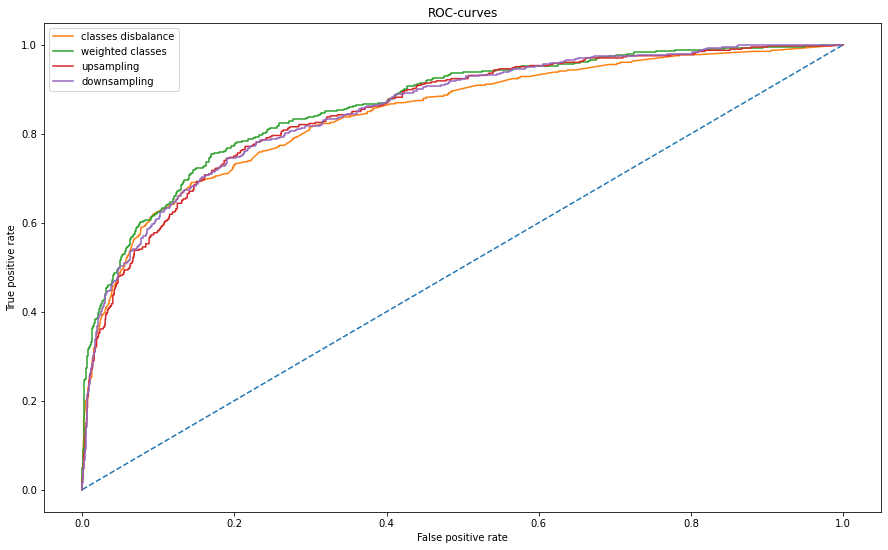

In [115]:
fpr, tpr, thresholds = roc_curve(target_test, rf_pred_prob_ones)
fpr_weights, tpr_weights, thresholds_weights = roc_curve(target_test, rf_weights_pred_prob_ones)
fpr_upsampling, tpr_upsampling, thresholds_upsampling = roc_curve(target_test, rf_upsampling_pred_prob_ones)
fpr_downsampling, tpr_downsampling, thresholds_downsampling = roc_curve(target_test, rf_downsampling_pred_prob_ones)

plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], linestyle='dashed')
plt.plot(fpr, tpr, label='classes disbalance')
plt.plot(fpr_weights, tpr_weights, label='weighted classes')
plt.plot(fpr_upsampling, tpr_upsampling, label='upsampling')
plt.plot(fpr_downsampling, tpr_downsampling, label='downsampling')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-curves')
plt.legend()
plt.show()

### Accuracy, precision и recall

Посмотрим и на другие традиционные метрики - accuracy, precision, recall.

In [116]:
accuracy = accuracy_score(target_test, rf_pred)
accuracy_weights = accuracy_score(target_test, rf_weights_pred)
accuracy_upsampling = accuracy_score(target_test, rf_upsampling_pred)
accuracy_downsampling = accuracy_score(target_test, rf_downsampling_pred)

precision = precision_score(target_test, rf_pred)
precision_weights = precision_score(target_test, rf_weights_pred)
precision_upsampling = precision_score(target_test, rf_upsampling_pred)
precision_downsampling = precision_score(target_test, rf_downsampling_pred)

recall = recall_score(target_test, rf_pred)
recall_weights = recall_score(target_test, rf_weights_pred)
recall_upsampling = recall_score(target_test, rf_upsampling_pred)
recall_downsampling = recall_score(target_test, rf_downsampling_pred)

In [117]:
testing_results['accuracy'] = [accuracy, accuracy_weights, accuracy_upsampling, accuracy_downsampling]
testing_results['precision'] = [precision, precision_weights, precision_upsampling, precision_downsampling]
testing_results['recall'] = [recall, recall_weights, recall_upsampling, recall_downsampling]

In [118]:
testing_results

,disbalance,F1-score,AUC-ROC,accuracy,precision,recall
0,classes disbalance,0.564103,0.843223,0.8555,0.730469,0.459459
1,weighted classes,0.619910,0.865442,0.8320,0.574423,0.673219
2,upsampling,0.600917,0.852297,0.8260,0.563441,0.643735
3,downsampling,0.584817,0.854997,0.7785,0.472727,0.766585


### Важность признаков

Оценим вклад каждого признака в модель.

In [119]:
feature_importances = pd.Series(data=rf_classifier_weights.feature_importances_, 
                                index=features.columns,
                                name='feature_importnace').sort_values(ascending=False)

In [120]:
feature_importances.to_frame()

,feature_importnace
Age,0.333666
NumOfProducts,0.219209
Balance,0.131582
EstimatedSalary,0.084915
CreditScore,0.081504
Geography_Germany,0.055098
IsActiveMember,0.053586
Gender_Male,0.020806
Geography_Spain,0.009841
HasCrCard,0.009794


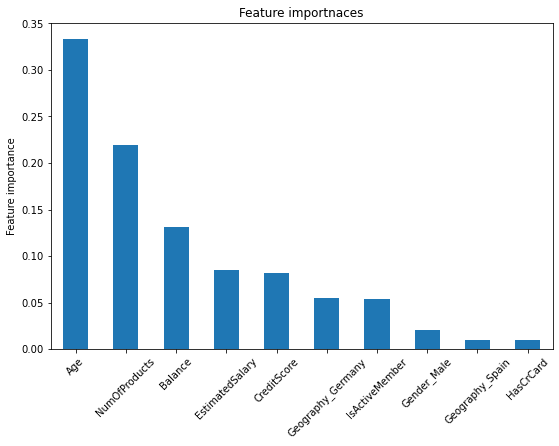

In [127]:
plt.figure(figsize=(9,6))
feature_importances.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Feature importance')
plt.title('Feature importnaces')
plt.show()

Наиболее значимым для модели оказался возраст клиента, а наиболее незначимым - наличие кредитной карты. Географическая принадлежность также не очень значима для модели, из чего делаем вывод, что география слабо влияет на факт выхода клиента из банка, тоже самое можно сказать про пол клиента. Помимо возраста, важными признаками являются количество продуктов, а также баланс клиента.

### Вывод

1. Модель случайного леса с взвешенными классами показала наивысшую F1-меру на тестовой выборке - 0.62, что удовлетворяет условию заказчика (0.59 и выше). Модели случайного леса, обученный на увеличенной и уменьшенной выборке показали F1-меру 0.601 и 0.585 соответственно. Модель случайного леса, не учитывающая дисбаланс классов - 0.564.
2. ROC-кривые и площади под ними сравнимы для всех моделей.
3. По точности и полноте можно сделать вывод, что модель с дисбалансом классов куда чаще предсказывает класс "0", о чем говорит высокая точность и низкая полнота. Если же используются методы борьбы с дисбалансом, модели начинают куда чаще предсказывать класс "1". Наилучший компромисс между точностью и полнотой (выраженный F1-мерой) достигнут с помощью взвешивания классов.
4. Несмотря на то, что модель, обученная на уменьшенной выборке, показала самую низкую производительность на тестовой выборке, ее нельзя назвать откровенно плохой. В данной задаче исследуется отток клиентов. Данная модель чаще остальных распознает класс "1", то есть тех, кто покинет банк. Это может быть выгодно, если нужно сохранить как можно больше клиентов.
5. Была оценена важность факторов. Ключевыми факторами, влияющими на факт выхода из банка, являются возраст, количество продуктов и баланс. География, пол и наличие кредитной оказывают слабое влияние.